In [67]:
import os
# os.chdir(r"D:\weather.csv")
# os.listdir()

!pip install seaborn
# Import matplotlib, seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
warnings.simplefilter(action='ignore', category=FutureWarning)


In [68]:
data=pd.read_csv(r"D:\weather.csv")

In [69]:
print(data.shape);

(16743, 14)


In [70]:
temp_df = data[["Date.Full","Data.Temperature.Avg Temp","Data.Temperature.Max Temp","Data.Temperature.Min Temp"]]
# temp_df = data[["Date.Full","Data.Temperature.Avg Temp"]]
temp_df.head(10)

,Date.Full,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp
0,2016-01-03,39,46,32
1,2016-01-03,39,47,31
2,2016-01-03,46,51,41
3,2016-01-03,45,52,38
4,2016-01-03,34,38,29
5,2016-01-03,38,44,31
6,2016-01-03,30,36,24
7,2016-01-03,22,32,9
8,2016-01-03,34,36,31
9,2016-01-03,38,43,33


In [71]:
print(temp_df.shape)


(16743, 4)


In [72]:
temp_df.describe()

,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp
count,16743.000000,16743.000000,16743.000000
mean,56.089112,66.042406,45.642716
std,18.798295,19.787954,18.559263
min,-27.000000,-19.000000,-35.000000
25%,44.000000,53.000000,33.000000
50%,58.000000,68.000000,47.000000
75%,71.000000,82.000000,60.000000
max,100.000000,111.000000,88.000000


In [73]:
print(temp_df.loc[temp_df["Data.Temperature.Avg Temp"] == temp_df["Data.Temperature.Avg Temp"].max()])
print(temp_df.loc[temp_df["Data.Temperature.Avg Temp"] == temp_df["Data.Temperature.Avg Temp"].min()])

       Date.Full  Data.Temperature.Avg Temp  Data.Temperature.Max Temp  \
9653  2016-07-31                        100                        111   

      Data.Temperature.Min Temp  
9653                         88  
        Date.Full  Data.Temperature.Avg Temp  Data.Temperature.Max Temp  \
15165  2016-12-04                        -27                        -19   

       Data.Temperature.Min Temp  
15165                        -35  


In [74]:
data.isnull().sum()

Data.Precipitation           0
Date.Full                    0
Date.Month                   0
Date.Week of                 0
Date.Year                    0
Station.City                 0
Station.Code                 0
Station.Location             0
Station.State                0
Data.Temperature.Avg Temp    0
Data.Temperature.Max Temp    0
Data.Temperature.Min Temp    0
Data.Wind.Direction          0
Data.Wind.Speed              0
dtype: int64

In [86]:
# # Box Plots
# fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
# i = 0
# for col in data.columns:
#     axs[i].boxplot(df[col], vert=False)
#     axs[i].set_ylabel(col)
#     i+=1
# plt.show()


<AxesSubplot:>

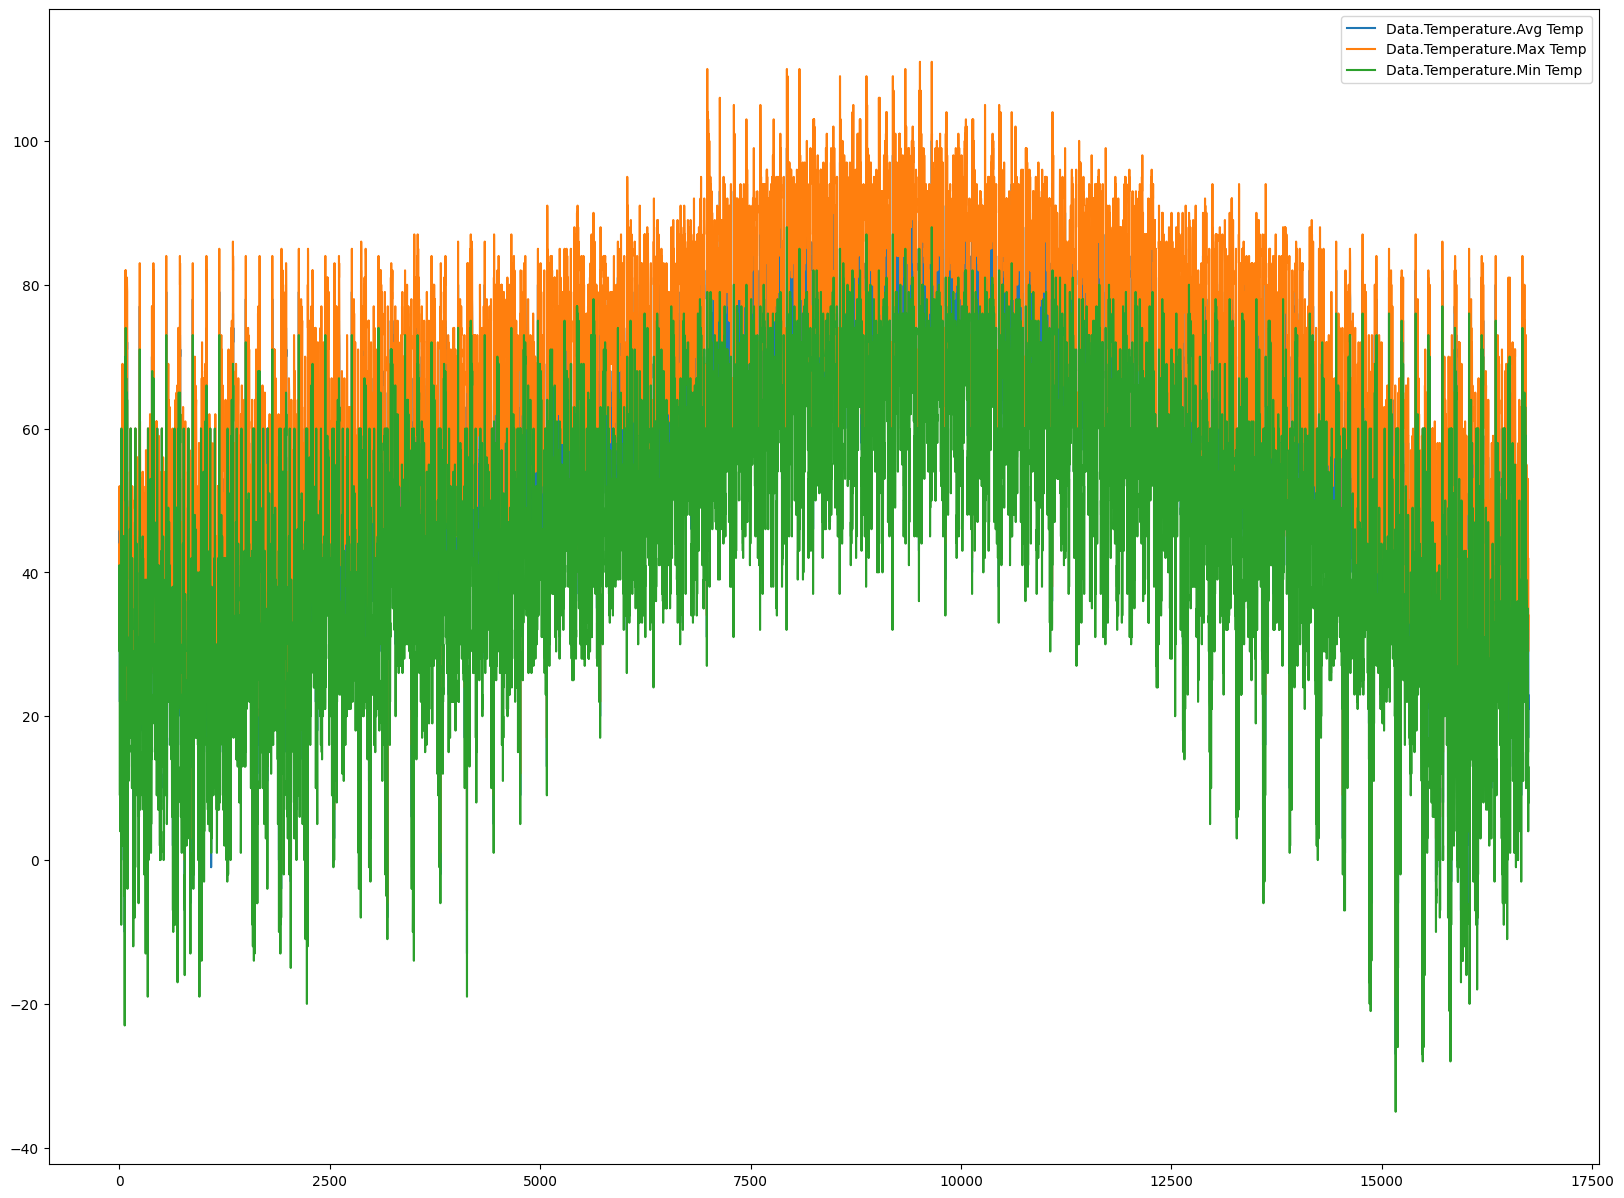

In [50]:
# # Plot the daily temperature change 
# plt.figure(figsize=(16,10), dpi=100)
# plt.plot(temp_df.index, temp_df, color='tab:red')
# plt.gca().set(title="Daily Temperature in Helsinki, Finland from 2016 to 2019", xlabel='Date', ylabel="Degree (in Celsius)")
# plt.show()
temp_df.plot(figsize=(20,15))

In [43]:

# temp_df.duplicated('Data.Temperature.Avg Temp')
temp_df.duplicated(['Data.Temperature.Avg Temp','Data.Temperature.Max Temp','Data.Temperature.Min Temp'])

0        False
1        False
2        False
3        False
4        False
         ...  
16738    False
16739     True
16740    False
16741    False
16742     True
Length: 16743, dtype: bool

In [51]:
data['Date.Full'].head()

0    2016-01-03
1    2016-01-03
2    2016-01-03
3    2016-01-03
4    2016-01-03
Name: Date.Full, dtype: object

In [53]:
data['Date.Full']=pd.to_datetime(data['Date.Full'])
data['Date.Full'].head()

0   2016-01-03
1   2016-01-03
2   2016-01-03
3   2016-01-03
4   2016-01-03
Name: Date.Full, dtype: datetime64[ns]

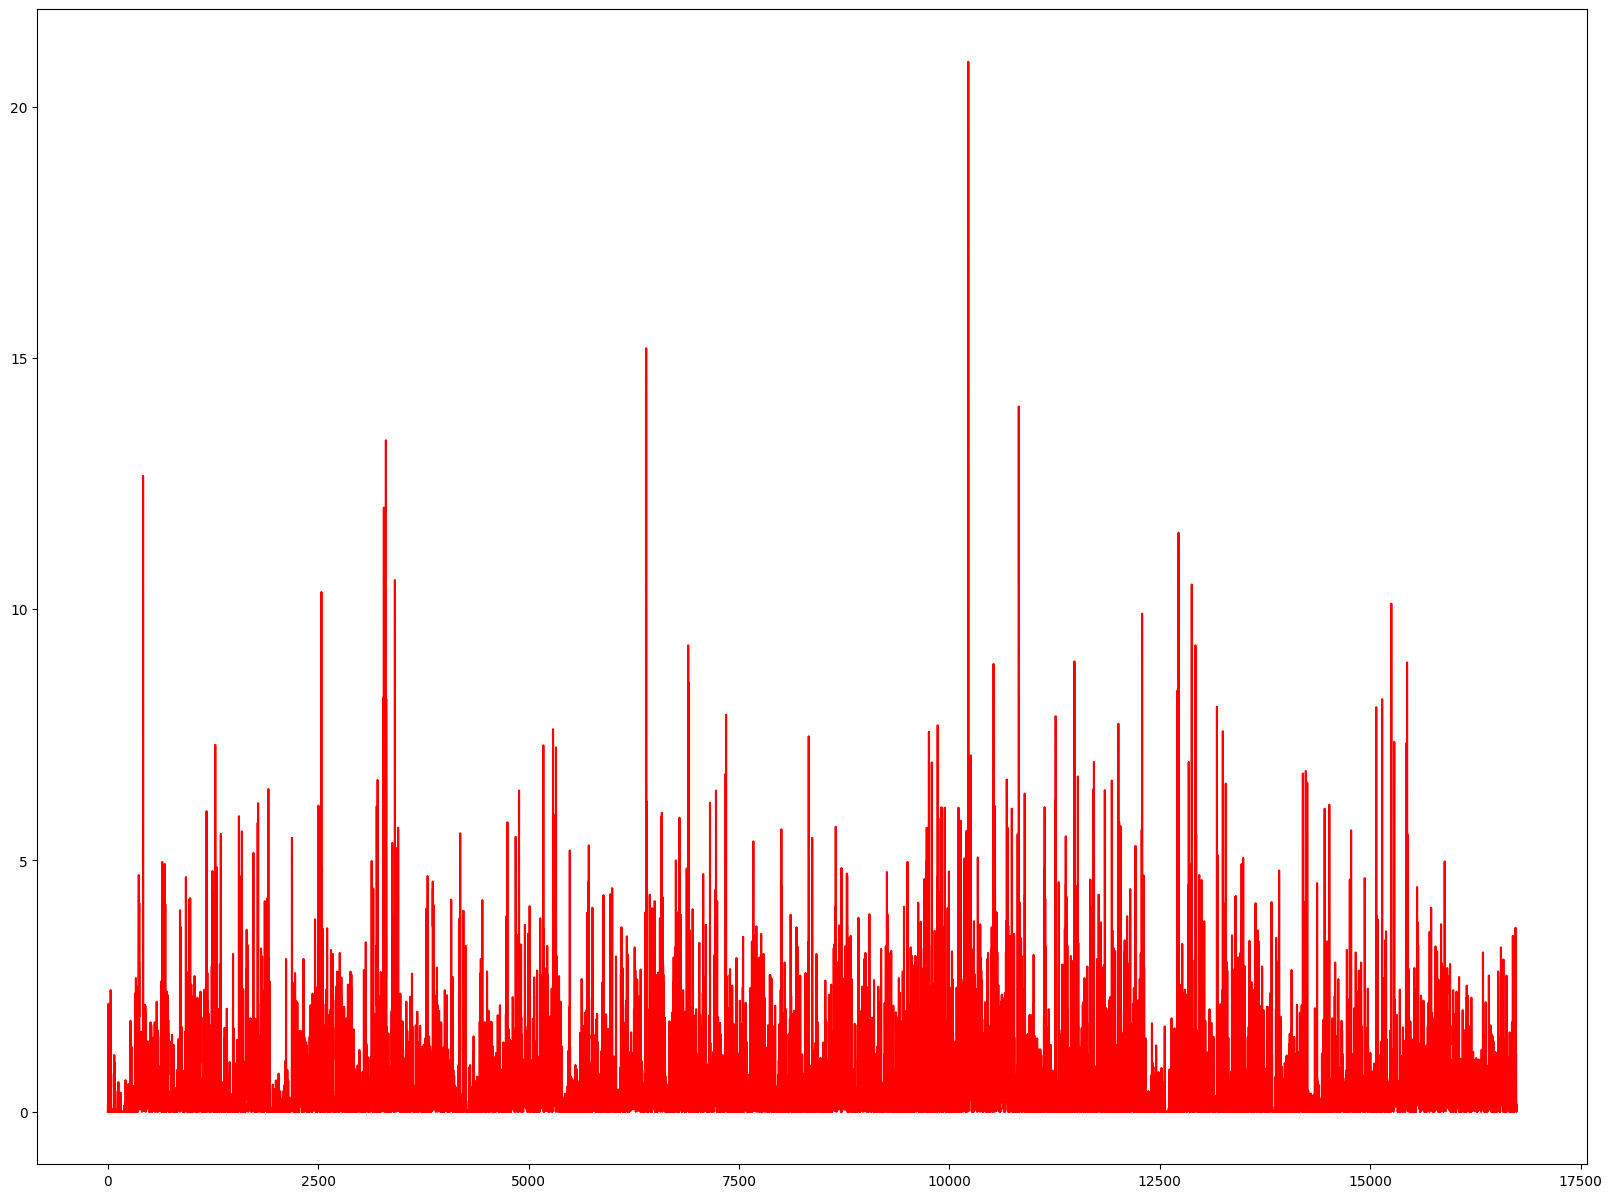

In [54]:
plt.figure(figsize=(20,15))
plt.plot(data.index,data['Data.Precipitation'],label='precipation',color='red')


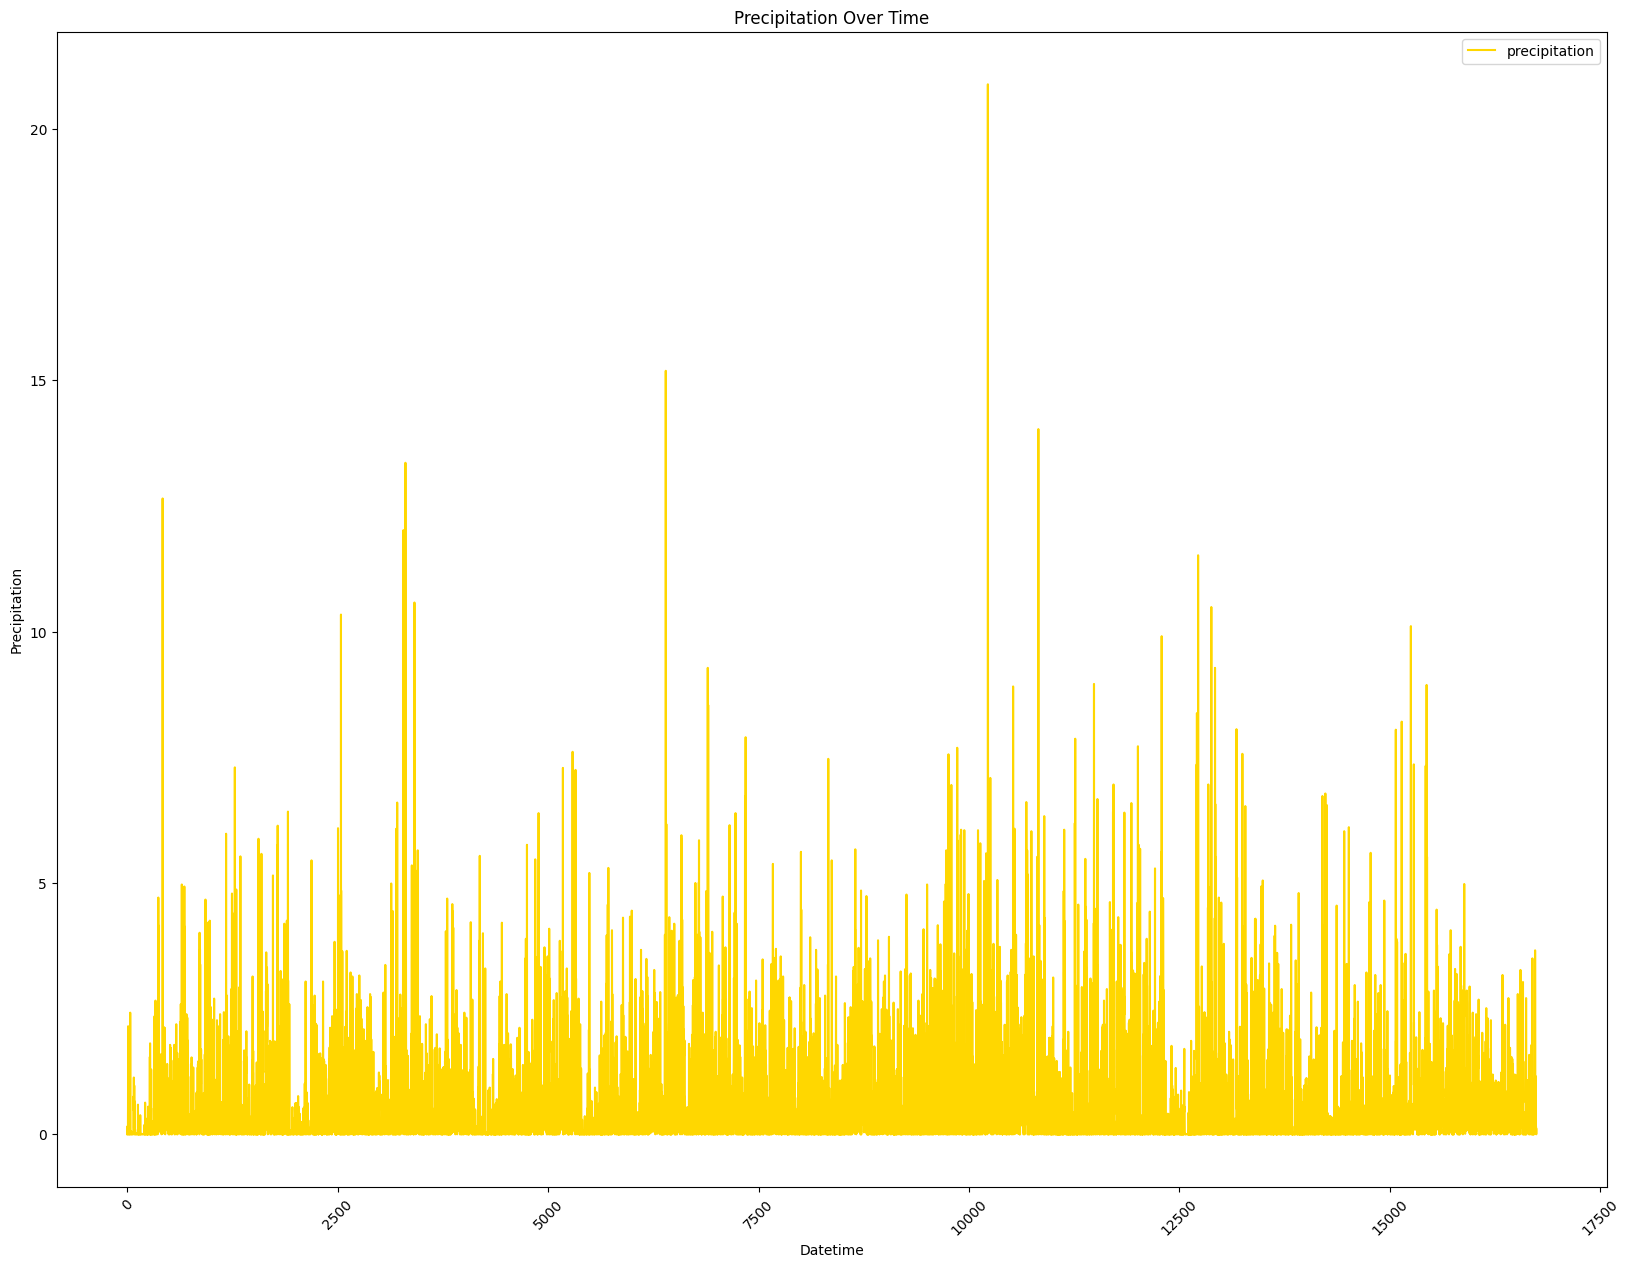

In [63]:
plt.figure(figsize=(20,15))
plt.plot(data.index,data['Data.Precipitation'],label="precipitation",color="gold")
plt.title("Precipitation Over Time")
plt.xlabel("Datetime")
plt.ylabel("Precipitation")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [64]:
df = pd.DataFrame(data)
display(df)

# Removing duplicates
unique_df = df.drop_duplicates()
display(unique_df)

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,0.08,2017-01-01,1,1,2017,Casper,CPR,"Casper, WY",Wyoming,23,32,15,23,19.98
16739,0.00,2017-01-01,1,1,2017,Cheyenne,CYS,"Cheyenne, WY",Wyoming,32,42,21,26,15.16
16740,0.00,2017-01-01,1,1,2017,Lander,LND,"Lander, WY",Wyoming,17,29,4,26,1.65
16741,0.06,2017-01-01,1,1,2017,Rawlins,RWL,"Rawlins, WY",Wyoming,23,31,13,24,18.16


,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,0.08,2017-01-01,1,1,2017,Casper,CPR,"Casper, WY",Wyoming,23,32,15,23,19.98
16739,0.00,2017-01-01,1,1,2017,Cheyenne,CYS,"Cheyenne, WY",Wyoming,32,42,21,26,15.16
16740,0.00,2017-01-01,1,1,2017,Lander,LND,"Lander, WY",Wyoming,17,29,4,26,1.65
16741,0.06,2017-01-01,1,1,2017,Rawlins,RWL,"Rawlins, WY",Wyoming,23,31,13,24,18.16


<AxesSubplot:>

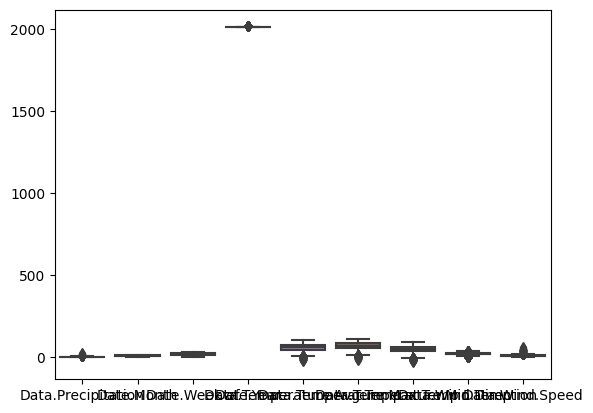

In [79]:

sns.boxplot(df)

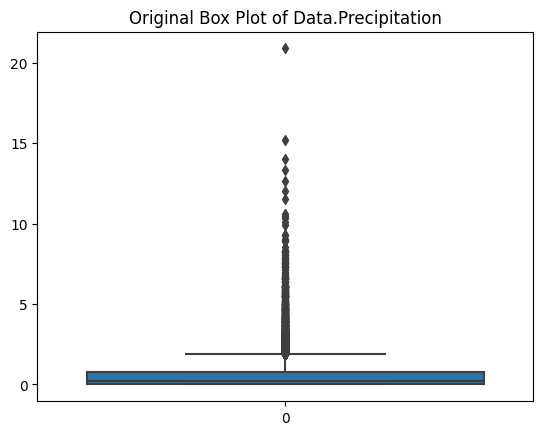

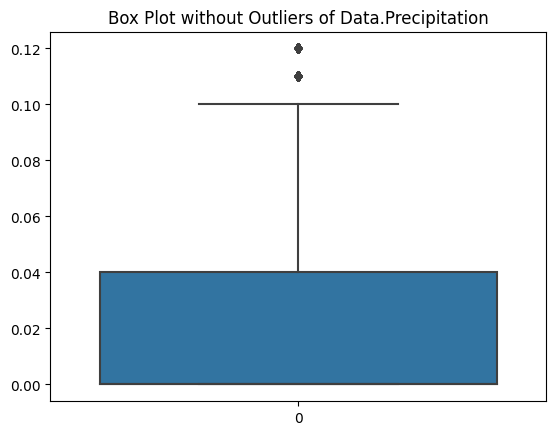

In [81]:

def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 0.12

no_outliers = removal_box_plot(df, 'Data.Precipitation', threshold_value)

In [85]:
# removal_box_plot(df, 'Data.Temperature.Avg Temp',0.12)